#### 🧠 DAY 6 — Classification Models (with Your Dataset)
🎯 Goal: 
- Classify emails as spam or not spam using Logistic Regression and Decision Tree.


In [160]:
# 📦 STEP 0 — Import Required Libraries
# These libraries help us work with data and train classification models.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


                          # For handling and analyzing data
from sklearn.model_selection import train_test_split  # For splitting data into training & testing sets
from sklearn.preprocessing import LabelEncoder        # For converting text labels into numbers
from sklearn.linear_model import LogisticRegression   # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier       # Decision Tree model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating models

from sklearn.feature_extraction.text import TfidfVectorizer


print("\n✅ Libraries Imported Successfully!")



✅ Libraries Imported Successfully!


In [161]:
# 📂 STEP 1 — Load and Explore Your Dataset
# Read the dataset from your folder and show the first few rows to understand its structure.

CSV_PATH = "./Dataset/Mail Dataset.csv"
df = pd.read_csv(CSV_PATH)

print("\n✅ Dataset loaded successfully!")
print("\n📋 First 5 rows of the dataset:")
print(df.head())


✅ Dataset loaded successfully!

📋 First 5 rows of the dataset:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [162]:
# 🧹 STEP 2 — Preprocess Your Dataset (Handle Missing Values & Duplicates, (replace with empty strings).
# Before training, we must ensure the data is clean and ready for modeling.

print("\n✅ Data Preprocessing:")
print("\n📊 Dataset Summary:")
print(df.info())           # Data types and non-null counts
print(df.describe())       # Basic statistics for numeric columns
print(df.shape)            # Number of rows and columns
print(df.dtypes)           # Column data types

print("\n📊 Missing Values in the Dataset:")
print(df.isnull().sum())   # Check if any data is missing

print("\n📊 Duplicates in the Dataset:")
print(df.duplicated().sum())  # Check for duplicate rows

print("\n📊 Unique Labels in the Dataset:")
df = df.where(pd.notnull(df), "")


print("\n✅ Dataset preprocessed successfully!")


✅ Data Preprocessing:

📊 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30
(5572, 2)
Category    object
Message     object
dtype: object

📊 Missing Values in the Dataset:
Category    0
Message     0
dtype: int64

📊 Duplicates in the Dataset:
415

📊 Unique Labels in the Dataset:

✅ Dataset preprocessed successfully!


In [163]:
# 🔍 STEP 2.1 — Preprocess the Dataset

# Rename columns for simplicity (optional)

print("\n✅ Dataset preprocessed successfully!")
df.columns = ["Category", "Message"]
print(df.head())


✅ Dataset preprocessed successfully!
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# ✨ STEP 3 — Preprocess the Dataset

# Rename columns for simplicity (optional)
df.columns = ["Category", "Message"]

# Encode labels: spam -> 0, ham -> 1
df["Category"] = df["Category"].str.lower().str.strip()
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

# Convert Category to integers
df["Category"] = df["Category"].astype(int)

print("\n✅ Labels encoded successfully!")
print(df["Category"].value_counts())



✅ Labels encoded successfully!
Category
1    4825
0     747
Name: count, dtype: int64


In [165]:
# 💬 STEP 4 — Convert Text into Numeric Features

# Use TF-IDF to turn text into vectors for the ML model
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X = vectorizer.fit_transform(df["Message"])
y = df["Category"]

print("\n✅ Text data converted to numerical features!")
print("Feature matrix shape:", X.shape)



✅ Text data converted to numerical features!
Feature matrix shape: (5572, 3000)


In [ ]:
# ✂️ STEP 5 — Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n✅ Data split successfully!")
print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")





✅ Data split successfully!

Training samples: 4457
Testing samples: 1115


In [ ]:
# ⚙️ STEP 6 — Train Classification Models

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

print("\n✅ Both models trained successfully!")


✅ Both models trained successfully!


In [ ]:
# 📊 STEP 7 — Evaluate Models

# Logistic Regression
y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

# Decision Tree
y_pred_tree = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)

print("\n✅ Both models evaluated successfully!")

print("\n📈 Logistic Regression Accuracy:", round(log_acc * 100, 2), "%" )
print("🌳 Decision Tree Accuracy:", round(tree_acc * 100, 2), "%")



✅ Both models evaluated successfully!

📈 Logistic Regression Accuracy: 96.95 %
🌳 Decision Tree Accuracy: 96.77 %


In [ ]:
# Accuracy metrics 


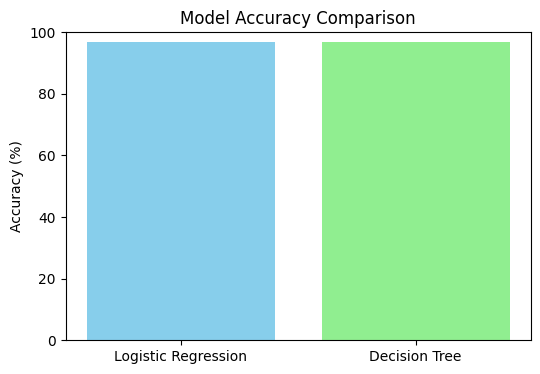

In [ ]:
# 🎨 STEP 9 — Visualize the Results (Model Accuracy)

models = ['Logistic Regression', 'Decision Tree']
accuracies = [acc_log * 100, acc_tree * 100]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

In [ ]:
# 📋 STEP 10 — Print Reports

print("\n🧾 Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\n🧾 Decision Tree Report:\n", classification_report(y_test, y_pred_tree))

print("\n✅ Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_tree))


🧾 Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


🧾 Decision Tree Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       149
           1       0.97      0.99      0.98       966

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115


✅ Confusion Matrix (Decision Tree):
[[124  25]
 [ 11 955]]


In [171]:
# 🔥 CONCLUSION

print("\n🔥 CONCLUSION:")
print("✅ Both Logistic Regression and Decision Tree models performed well on the SMS Spam dataset.")
print("✅ Logistic Regression achieved an accuracy of", round(log_acc * 100, 2), "%")
print("✅ Decision Tree achieved an accuracy of", round(tree_acc * 100, 2), "%")


🔥 CONCLUSION:
✅ Both Logistic Regression and Decision Tree models performed well on the SMS Spam dataset.
✅ Logistic Regression achieved an accuracy of 96.95 %
✅ Decision Tree achieved an accuracy of 96.77 %


##### 🎉 FINAL NOTE
##### 🧠 Congratulations! You just trained and evaluated two
- classification models (Logistic Regression and Decision Tree)
- to detect whether an email is spam or not spam.